Count of missing values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Duplicates:
97882


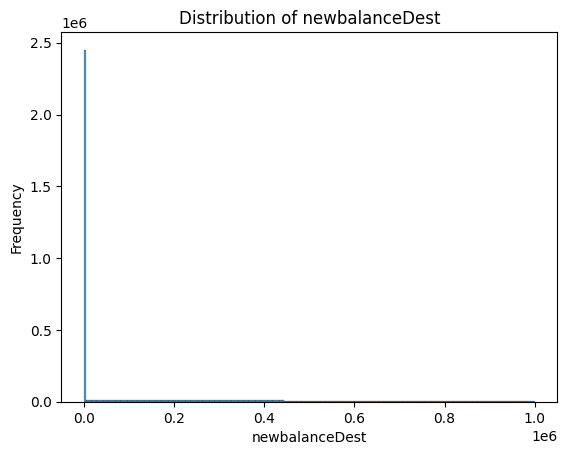

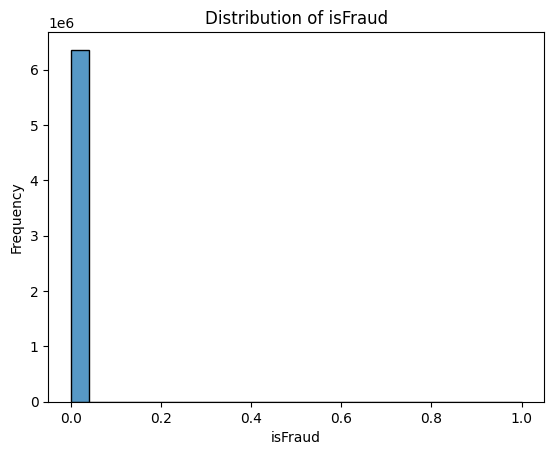

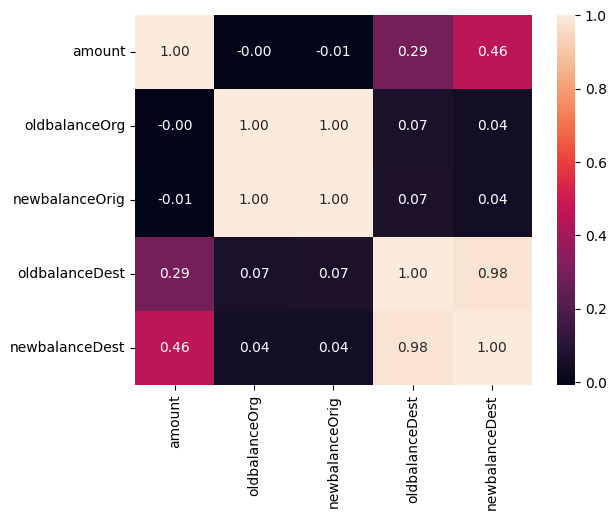

Count of 0 in isFraud: 6362604
Count of 1 in isFraud: 16


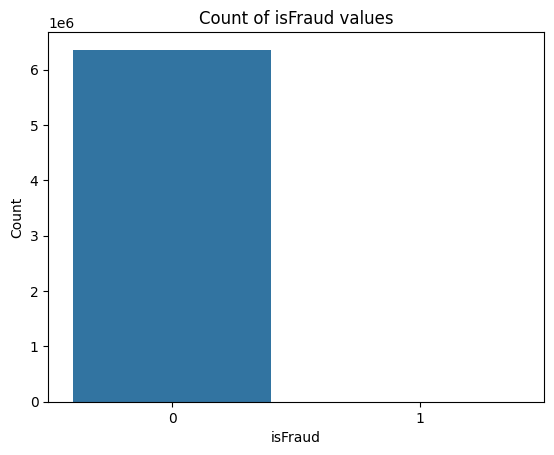

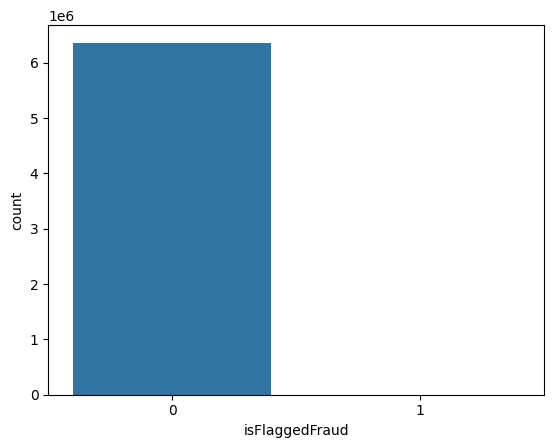

training
Accuracy:  0.6720575276641803
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80   1908785
           1       0.00      1.00      0.00         1

    accuracy                           0.67   1908786
   macro avg       0.50      0.84      0.40   1908786
weighted avg       1.00      0.67      0.80   1908786

Confusion Matrix:
 [[1282813  625972]
 [      0       1]]
process completed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Preparation
# Reading the data
f = pd.read_csv(r"C:\Users\Chandra\Downloads\fraud.csv")

# Accepting columns that are required
#amount ,   oldbalanceOrig ,    newbalanceOrig ,  oldbalanceDest ,   newbalanceDest ,  y= isFraud are used.
#by using all these columns we can get into the conclusion of if its fraud or not.
selected_features = [2, 4, 5, 7, 8]
x = f.iloc[:, selected_features]
y = f.iloc[:, -1]

# Cleaning empty cells
x = x.dropna()

# Count of missing values
print("Count of missing values:")
print(f.isna().sum())

# No duplicates
print("Duplicates:")
print(x.duplicated().sum())

# Step 2: Exploratory Data Analysis (EDA)
# Histogram for 'newbalanceDest'
sns.histplot(x['newbalanceDest'], binrange=(0, 1000000))
plt.title('Distribution of newbalanceDest')
plt.xlabel('newbalanceDest')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'isFraud'
sns.histplot(y)
plt.title('Distribution of isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.show()

# Finding correlation
co_r = x.corr()
sns.heatmap(co_r, annot=True, fmt='.2f')
plt.show()

# Fraud counts
fraud_counts = y.value_counts()

# Extract counts for '0' and '1'
count_0 = fraud_counts.get(0, 0)
count_1 = fraud_counts.get(1, 0)

# Print counts or use them as needed
print("Count of 0 in isFraud:", count_0)
print("Count of 1 in isFraud:", count_1)

# Plot the counts
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Count of isFraud values')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

#plot count
sns.countplot(x='isFlaggedFraud',data=f)
plt.show()

# Step 3: Modeling
#As We Have To predict if its fraud or not ,it is a binary classification .hence LOGISTIC REGRESSION is used.
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
print("training")
# Logistic Regression
l = LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000, n_jobs=-1)
l.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = l.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("process completed.")
